<a href="https://colab.research.google.com/github/krushitdudhat/project0/blob/master/learn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x
import tensorflow as tf

#mit packages 
!pip install mitdeeplearning
import mitdeeplearning as mdl

import numpy as np
import matplotlib.pyplot as plt


     |████████████████████████████████| 2.1MB 8.3MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-cp37-none-any.whl size=2115441 sha256=3ce7f37d99982bc7a6ce741d42e7bde9c321ddb5b1adf8bf27c96ecbd3b9c406
  Stored in directory: /root/.cache/pip/wheels/af/dc/2a/5c3633135e7e4ef4fd31463cfa1942cb1bae7486ab94e7a2ad
Successfully built mitdeeplearning


In [3]:
sport = tf.constant("tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


In [4]:
sports = tf.constant(["tennis", "Basketball"], tf.string)
numbers = tf.constant([3.13345, 1.34562, 2.34562], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))


`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d tensor with shape: [3]


In [5]:
matrix = tf.constant([[1,2,4], [5,3,6], [7.5,7.45, 23.54]], tf.float64)
assert isinstance(matrix, tf.Tensor)
assert tf.rank(matrix).numpy() == 2

In [6]:
images = tf.constant(tf.zeros([10,256,256,3], tf.int32))

assert isinstance(images, tf.Tensor)
assert tf.rank(images).numpy() ==4
assert tf.shape(images).numpy().tolist() == [10,256,256,3]

In [7]:
row_vector = matrix[1]
column_vector = matrix[:,2]
scalar = matrix[1,2]

print("`row_vector` : {}".format(row_vector.numpy()))
print("`column_vector` : {}".format(column_vector.numpy()))
print("`scalar` : {} ".format(scalar.numpy()))


`row_vector` : [5. 3. 6.]
`column_vector` : [ 4.    6.   23.54]
`scalar` : 6.0 


In [8]:
#creating the node in graph and initializing value
a = tf.constant(45)
b = tf.constant(54)

#add them
c1 = tf.add(a,b)
c2 = a + b
print(c1)
print(c2)

tf.Tensor(99, shape=(), dtype=int32)
tf.Tensor(99, shape=(), dtype=int32)


In [9]:
def func(a,b):
  c = tf.add(a,b)
  d = tf.subtract(b,1)
  e = tf.multiply(c,d)
  return e


In [10]:
# a = tf.constant(1.5,tf.float64)
# b = tf.constant(2.5, tf.float64)
a, b = 1.5, 2.5
#execute function
e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


neural network in tensorflow

In [11]:
#defining a network layer 

#n_output_nodes: number of output nodes
#input_shape : shape of the input
#x: input to the layer

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes
  
  def build(self, input_shape):
    d = int(input_shape[-1])
    #define and intialize parameter : a weight w and bias b
    #parameter initialization is random
    self.w = self.add_weight("weight", shape=[d, self.n_output_nodes])#note the dimentiality
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes])#note the dimentiality

  def call(self, x):
    #forword propagate the input
    z = tf.matmul(x, self.w) + self.b
    #feed throuth a non-linear activation
    y = tf.math.sigmoid(z)
    return y

#layer parameter are inintialized randomly, we will set a reandom seed for reproducibility
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

#test the output
print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)


[[0.2697859  0.45750412 0.66536945]]
[PASS] test_custom_dense_layer_output


True

In [12]:
##defining  a neural network using the sequentioal API 

#Import packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#define the number of outputs
n_output_nodes = 3

#first define the model
model = Sequential()

dense_layer = Dense(n_output_nodes, use_bias=True , bias_initializer = 'zeros', activation='sigmoid')

model.add(dense_layer)





In [13]:
#test model with example input
x_imput = tf.constant([[1,2.]], shape=(1,2))

model_output = model.predict(x_input)
print(model_output)

[[0.5607363 0.6566898 0.1249697]]


In [14]:
## defining a model using subclassing 

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):
  def __init__(self, n_output_nodes):
     super(SubclassModel, self).__init__()
     self.dense_layer = Dense(n_output_nodes ,activation='sigmoid')
  
  def call(self, inputs):
    return self.dense_layer(inputs)


In [15]:
n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_imput = tf.constant([[1,2.]], shape = (1,2))

print(model.call(x_input))

tf.Tensor([[0.6504887  0.47828162 0.8373661 ]], shape=(1, 3), dtype=float32)


In [16]:
## defining a model using subclassing and specifing custom behavior

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model):

  #As before, in__init__ we define the model's layer
  #
  def __init__(self, n_output_nodes):
    super(IdentityModel, self).__init__()
    self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation = 'sigmoid')
  
  def call(self, inputs, isidentity = False):
    x = self.dense_layer(inputs)
    if isidentity:
      return inputs
    return x

  

In [17]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1, 2.]], shape= (1,2))

out_activate = model.call(x_input)
out_identity = model.call(x_input, isidentity = False)

print("Networik output with activation: {}:] network identity output: {}".format(out_activate.numpy(), out_identity.numpy()))

Networik output with activation: [[0.29996255 0.62776643 0.48460066]]:] network identity output: [[0.29996255 0.62776643 0.48460066]]


automatic differentiation in tensorflow

In [18]:
## gradient computation with gradienttape

#y = x^2
# example : x = 3

x = tf.Variable(3.0)

#Initiate the gradient tape
with tf.GradientTape() as tape:
  #function
  y = x * x
#access the gradient //derivation of y with respect to x
dy_dx = tape.gradient(y,x)

assert dy_dx.numpy() == 6.0

Initializing x=[[-0.3974985]]


Text(0, 0.5, 'x value')

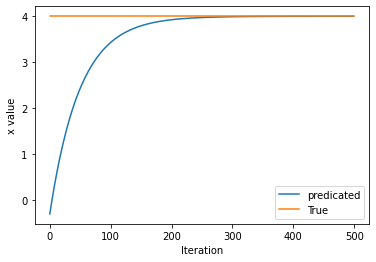

In [24]:
## function minimization with automatic differentiation and SGD

# Initialization a random value for initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 #learning rate for sgd
history = []
#define the target value
x_f = 4

#we will run sgd for a number of iteration at each iteration, we compute the loss,
# compute the derivative of loss with respect to x, and perform the sgd update.

for i in range(500):
  with tf.GradientTape() as tape:
    loss = (x - x_f)**2

  #loss minimization using gradiant tape
  grad = tape.gradient(loss, x)
  new_x = x - learning_rate*grad
  x.assign(new_x)
  history.append(x.numpy()[0])

#plot the evolutin of x as we optimize towards x_f1
plt.plot(history)
plt.plot([0,500],[x_f,x_f])
plt.legend(('predicated', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
